### Victor Rene Pérez Mayen.
### 19005180

### Proyecto Statistical Learning II

#### MLP

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping,ModelCheckpoint

Using TensorFlow backend.


***
## Análisis exploratorio de datos

In [2]:
data_set = pd.read_csv("Folds5x2_pp.csv", sep = ";", encoding = "ISO-8859-1")
data_set.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [3]:
data_shape = data_set.shape
data_shape

(47840, 5)

In [4]:
#Se buscan los Null
np.sum(data_set.isnull())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

***
#### Data y
Se hace one hot encoding para las label

In [5]:
data_y = data_set["PE"]
data_y.shape

(47840,)

#### Data X

In [6]:
col_name = data_set.columns
col_name

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [7]:
col_x = col_name.drop("PE")
col_x

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [8]:
data_x = data_set[col_x]
data_x.shape

(47840, 4)

In [9]:
data_x.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


#### Split data_test y data_train

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 0)

***
### Construcción modelo

In [11]:
model_1 = Sequential()
model_1.add(Dense(32, input_shape = (4, ), activation = "relu"))
model_1.add(BatchNormalization())
model_1.add(Dense(32, activation = "relu"))
model_1.add(BatchNormalization())
model_1.add(Dense(32, activation = "relu"))
model_1.add(BatchNormalization())
model_1.add(Dense(1, activation = "linear"))
model_1.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mse"])
model_1.summary()






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total

In [12]:
monitor_val_acc_1 = EarlyStopping(monitor = "mse", patience = 10)
modelCheckpoint_1 = ModelCheckpoint("planta_electrica.hdf5", save_best_only = True)

history_1 = model_1.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks = [monitor_val_acc_1, modelCheckpoint_1])
error_1 = model_1.evaluate(x_test, y_test)[1]
print('Error:', error_1)


Train on 30617 samples, validate on 7655 samples
Epoch 1/100
30617/30617 [==============================] - 3s 111us/step - loss: 204724.4500 - mean_squared_error: 204724.4500 - val_loss: 200777.7965 - val_mean_squared_error: 200777.7965


C:\Users\Jose\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `mse` which is not available. Available metrics are: val_loss,val_mean_squared_error,loss,mean_squared_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/100
30617/30617 [==============================] - 2s 51us/step - loss: 195904.2763 - mean_squared_error: 195904.2763 - val_loss: 202621.9773 - val_mean_squared_error: 202621.9773
Epoch 3/100
30617/30617 [==============================] - 1s 45us/step - loss: 179697.0547 - mean_squared_error: 179697.0547 - val_loss: 196972.2395 - val_mean_squared_error: 196972.2395
Epoch 4/100
30617/30617 [==============================] - 1s 31us/step - loss: 157948.5257 - mean_squared_error: 157948.5257 - val_loss: 158825.7123 - val_mean_squared_error: 158825.7123
Epoch 5/100
30617/30617 [==============================] - 1s 41us/step - loss: 132960.5730 - mean_squared_error: 132960.5730 - val_loss: 111807.6708 - val_mean_squared_error: 111807.6708
Epoch 6/100
30617/30617 [==============================] - 1s 30us/step - loss: 106958.8140 - mean_squared_error: 106958.8140 - val_loss: 94951.3450 - val_mean_squared_error: 94951.3450
Epoch 7/100
30617/30617 [==============================] - 1s 

30617/30617 [==============================] - 1s 31us/step - loss: 18.2411 - mean_squared_error: 18.2411 - val_loss: 25.6812 - val_mean_squared_error: 25.6812
Epoch 49/100
30617/30617 [==============================] - 1s 31us/step - loss: 18.0681 - mean_squared_error: 18.0681 - val_loss: 19.1994 - val_mean_squared_error: 19.1994
Epoch 50/100
30617/30617 [==============================] - 1s 29us/step - loss: 18.2698 - mean_squared_error: 18.2698 - val_loss: 29.3871 - val_mean_squared_error: 29.3871
Epoch 51/100
30617/30617 [==============================] - 1s 37us/step - loss: 18.1727 - mean_squared_error: 18.1727 - val_loss: 78.0333 - val_mean_squared_error: 78.0333
Epoch 52/100
30617/30617 [==============================] - 1s 29us/step - loss: 18.4990 - mean_squared_error: 18.4990 - val_loss: 64.4032 - val_mean_squared_error: 64.4032
Epoch 53/100
30617/30617 [==============================] - 1s 29us/step - loss: 18.5799 - mean_squared_error: 18.5799 - val_loss: 54.4237 - val_mea

30617/30617 [==============================] - 1s 33us/step - loss: 17.6412 - mean_squared_error: 17.6412 - val_loss: 48.5474 - val_mean_squared_error: 48.5474
Epoch 96/100
30617/30617 [==============================] - 1s 44us/step - loss: 17.7019 - mean_squared_error: 17.7019 - val_loss: 24.5659 - val_mean_squared_error: 24.5659
Epoch 97/100
30617/30617 [==============================] - 2s 73us/step - loss: 17.2940 - mean_squared_error: 17.2940 - val_loss: 54.7583 - val_mean_squared_error: 54.7583
Epoch 98/100
30617/30617 [==============================] - 1s 43us/step - loss: 17.8515 - mean_squared_error: 17.8515 - val_loss: 28.3436 - val_mean_squared_error: 28.3436
Epoch 99/100
30617/30617 [==============================] - 1s 39us/step - loss: 17.7396 - mean_squared_error: 17.7396 - val_loss: 18.2407 - val_mean_squared_error: 18.2407
Epoch 100/100
9568/9568 [==============================] - 0s 18us/step
Error: 64.95986464509996


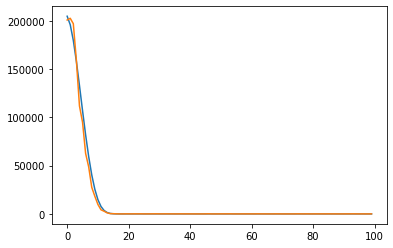

In [13]:
plt.figure()
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

In [14]:
predicciones = model_1.predict(x_test)

In [15]:
print(predicciones)

[[435.38647]
 [441.18555]
 [462.00214]
 ...
 [456.83395]
 [474.86313]
 [453.99847]]


In [16]:
print(y_test.values)

[436.29 438.08 476.12 ... 461.7  483.03 465.52]


***
### Modelo 2 utilizando RMSprop

In [17]:
model_2 = Sequential()
model_2.add(Dense(128, input_shape = (4, ), activation = "relu"))
model_2.add(BatchNormalization())
model_2.add(Dense(128, activation = "relu"))
model_2.add(BatchNormalization())
model_2.add(Dense(128, activation = "relu"))
model_2.add(BatchNormalization())
model_2.add(Dense(1, activation = "linear"))
model_2.compile(loss = "mean_squared_error", optimizer = "RMSprop", metrics = ["mse"])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total para

In [18]:
monitor_val_acc_2 = EarlyStopping(monitor = "mse", patience = 10)
modelCheckpoint_2 = ModelCheckpoint("planta_electrica_sgd.hdf5", save_best_only = True)

history_2 = model_2.fit(x_train, y_train, epochs = 100, batch_size = 32,
                        validation_split = 0.2, callbacks = [monitor_val_acc_2, modelCheckpoint_2])
error_2 = model_2.evaluate(x_test, y_test)[1]
print('Error:', error_2)

Train on 30617 samples, validate on 7655 samples
Epoch 1/100
30617/30617 [==============================] - 9s 281us/step - loss: 164901.0965 - mean_squared_error: 164901.0965 - val_loss: 111876.3380 - val_mean_squared_error: 111876.3380


C:\Users\Jose\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `mse` which is not available. Available metrics are: val_loss,val_mean_squared_error,loss,mean_squared_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/100
30617/30617 [==============================] - 5s 174us/step - loss: 33313.2399 - mean_squared_error: 33313.2399 - val_loss: 33.6029 - val_mean_squared_error: 33.6029
Epoch 3/100
30617/30617 [==============================] - 6s 184us/step - loss: 30.4860 - mean_squared_error: 30.4860 - val_loss: 130.0796 - val_mean_squared_error: 130.0796
Epoch 4/100
30617/30617 [==============================] - 7s 231us/step - loss: 29.3801 - mean_squared_error: 29.3801 - val_loss: 310.1940 - val_mean_squared_error: 310.1940
Epoch 5/100
30617/30617 [==============================] - 6s 186us/step - loss: 28.7996 - mean_squared_error: 28.7996 - val_loss: 301.3799 - val_mean_squared_error: 301.3799
Epoch 6/100
30617/30617 [==============================] - 7s 220us/step - loss: 28.7091 - mean_squared_error: 28.7091 - val_loss: 258.9290 - val_mean_squared_error: 258.9290
Epoch 7/100
30617/30617 [==============================] - 6s 210us/step - loss: 28.2341 - mean_squared_error: 28.2341 - 

Epoch 49/100
30617/30617 [==============================] - 8s 262us/step - loss: 25.8206 - mean_squared_error: 25.8206 - val_loss: 29.6622 - val_mean_squared_error: 29.6622
Epoch 50/100
30617/30617 [==============================] - 5s 167us/step - loss: 26.5240 - mean_squared_error: 26.5240 - val_loss: 58.6467 - val_mean_squared_error: 58.6467
Epoch 51/100
30617/30617 [==============================] - 6s 199us/step - loss: 25.8931 - mean_squared_error: 25.8931 - val_loss: 33.2305 - val_mean_squared_error: 33.2305
Epoch 52/100
30617/30617 [==============================] - 7s 245us/step - loss: 25.7897 - mean_squared_error: 25.7897 - val_loss: 44.0471 - val_mean_squared_error: 44.0471
Epoch 53/100
30617/30617 [==============================] - 6s 209us/step - loss: 25.7568 - mean_squared_error: 25.7568 - val_loss: 30.7539 - val_mean_squared_error: 30.7539
Epoch 54/100
30617/30617 [==============================] - 4s 125us/step - loss: 25.8156 - mean_squared_error: 25.8156 - val_loss

30617/30617 [==============================] - 18s 574us/step - loss: 25.7116 - mean_squared_error: 25.7116 - val_loss: 32.0163 - val_mean_squared_error: 32.0163
Epoch 96/100
30617/30617 [==============================] - 12s 391us/step - loss: 25.4372 - mean_squared_error: 25.4372 - val_loss: 60.9636 - val_mean_squared_error: 60.9636
Epoch 97/100
30617/30617 [==============================] - 4s 125us/step - loss: 26.0511 - mean_squared_error: 26.0511 - val_loss: 25.9324 - val_mean_squared_error: 25.9324
Epoch 98/100
30617/30617 [==============================] - 12s 406us/step - loss: 25.3619 - mean_squared_error: 25.3619 - val_loss: 64.4062 - val_mean_squared_error: 64.4062
Epoch 99/100
30617/30617 [==============================] - 6s 194us/step - loss: 25.9465 - mean_squared_error: 25.9465 - val_loss: 73.8177 - val_mean_squared_error: 73.8177
Epoch 100/100
9568/9568 [==============================] - 1s 58us/step
Error: 36.46765107374925


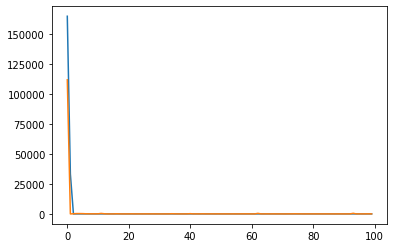

In [19]:
plt.figure()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

In [20]:
plt.figure()
plt.plot(history_2.history['mse'])
plt.plot(history_2.history['val_mse'])

KeyError: 'mse'

<Figure size 432x288 with 0 Axes>

In [ ]:
monitor_val_acc_2 = EarlyStopping(monitor = "val_acc", patience = 3)
modelCheckpoint_2 = ModelCheckpoint("beer_no_batch.hdf5", save_best_only = True)

history_2 = model_1.fit(x_train, y_train, epochs = 100, validation_split = 0.2, callbacks = [monitor_val_acc_2, modelCheckpoint_2])
accuracy_2 = model_1.evaluate(x_test, y_test)[1]
print('Accuracy:', accuracy_2)

In [ ]:
plt.figure()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

In [ ]:
plt.figure()
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])

In [ ]:
history_2 = norm_model.fit(x_train, y_train, epochs = 100, validation_split = 0.2, callbacks = [monitor_val_acc, modelCheckpoint])
accuracy = norm_model.evaluate(x_test, y_test)[1]
print('Accuracy:', accuracy)

In [ ]:
plt.figure()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

In [ ]:
plt.figure()
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])